# 08 - Facet Grids in Seaborn

## Goal
Learn to create **small multiples** (grid plots) to visualize data subsets across categorical variables.
- **`FacetGrid`**: The foundational class for grid plotting.
- **`map()`**: Applying plotting functions to each facet.
- **Ordering**: Controlling row/column order (`row_order`, `col_order`).
- **Shared axes**: Managing `sharex` and `sharey` to balance comparison vs. independence.

## Why Faceting?
Faceting (or "trellising") is powerful for:
- Comparing distributions across groups (e.g., regions, time periods).
- Checking if a relationship (e.g., price vs. demand) holds true across different segments.
- Avoiding "spaghetti plots" where too many lines/points overlap.

## Quick cheat sheet
| Task | Function / Method | Key params |
|---|---|---|
| Create grid | `g = sns.FacetGrid(data, ...)` | `row`, `col`, `hue`, `height`, `aspect` |
| Plot on grid | `g.map(func, ...)` | `func` (e.g. `sns.scatterplot`), column names |
| Plot on grid (DataFrame) | `g.map_dataframe(func, ...)` | Better for seaborn functions that take `data=` |
| Add legend | `g.add_legend()` | - |
| Titles/Labels | `g.set_axis_labels()`, `g.set_titles()` | `row_template`, `col_template` |

## Setup


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', context='notebook')
np.random.seed(42)

# Load tips dataset (great for faceting by day/time/sex)
tips = sns.load_dataset('tips')
print(tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## 1) The Basic FacetGrid
`FacetGrid` sets up the figure structure (rows and columns) but draws nothing until you call `map`.

### Workflow
1. Initialize: `g = sns.FacetGrid(df, col='category')`
2. Map: `g.map(sns.histplot, 'numeric_var')`


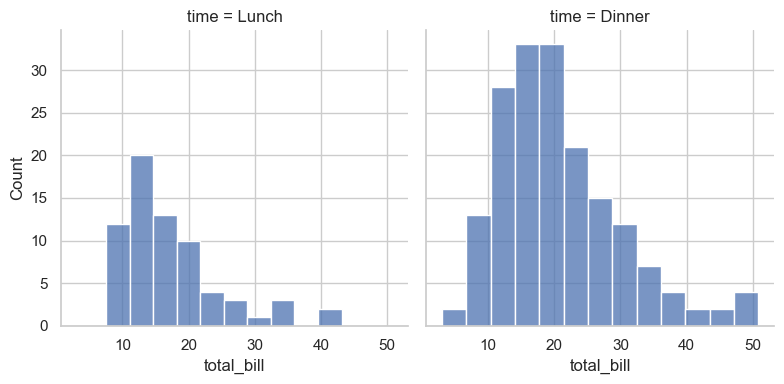

In [2]:
# Basic FacetGrid: Histogram of total_bill faceted by 'time'
g = sns.FacetGrid(tips, col='time', height=4)
g.map(sns.histplot, 'total_bill')
plt.show()


## 2) Mapping Bivariate Plots
You can pass multiple variables to `map` for scatter plots or other bivariate visualizations.

### Using `map_dataframe`
For Seaborn functions (like `scatterplot`, `lineplot`), it is safer/better to use `map_dataframe`.


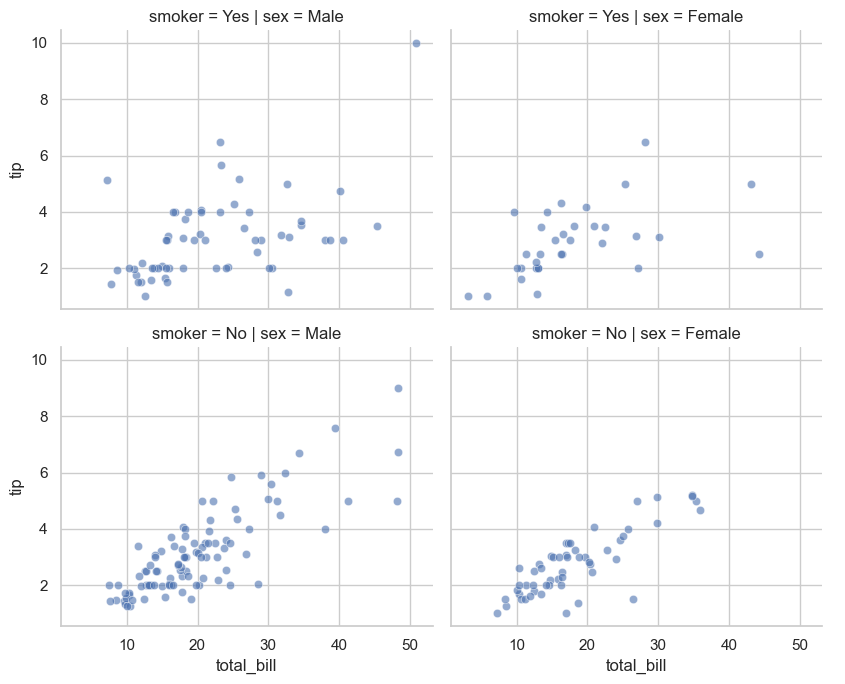

In [3]:
# Facet by 'sex' (cols) and 'smoker' (rows)
# Plot: scatter of total_bill vs tip
g = sns.FacetGrid(tips, col='sex', row='smoker', height=3.5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip', alpha=0.6)
g.add_legend()
plt.show()


## 3) Controlling Layout & Ordering
Use `col_order` or `row_order` to force a specific sequence. This is crucial for ordinal variables (e.g., "Low", "Medium", "High").

### `hue` mapping within facets
You can combine `col/row` faceting with `hue` inside each plot.


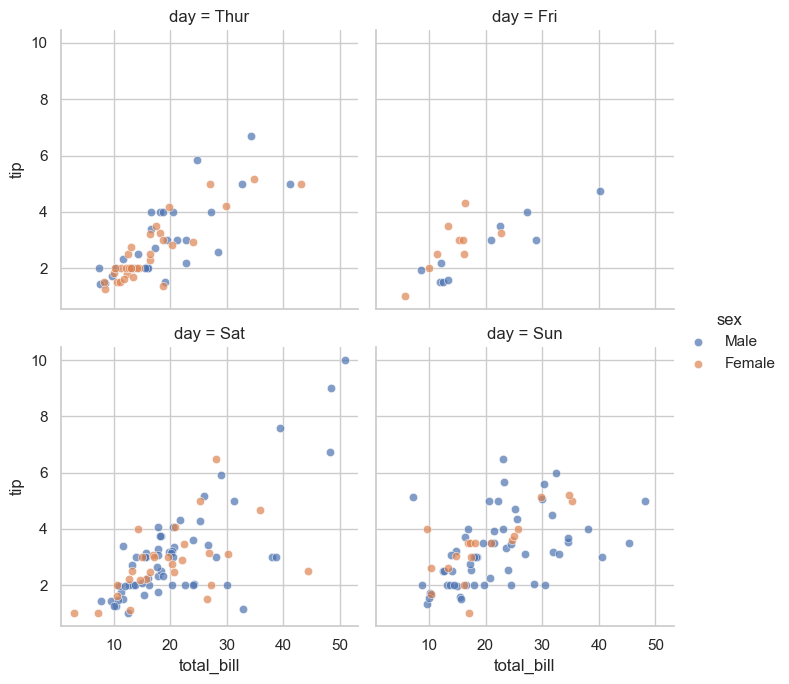

In [4]:
# Faceting by 'day' with specific order, hue by 'sex'
day_order = ['Thur', 'Fri', 'Sat', 'Sun']

g = sns.FacetGrid(
    tips, 
    col='day', 
    col_order=day_order, 
    hue='sex', 
    col_wrap=2,   # Wrap to new line after 2 columns
    height=3.5
)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip', alpha=0.7)
g.add_legend()
plt.show()


## 4) Shared Axes (`sharex`, `sharey`)
By default, `FacetGrid` shares axes (`True`).
- **True**: Good for comparing magnitudes directly.
- **False**: Good if groups have vastly different scales or ranges.


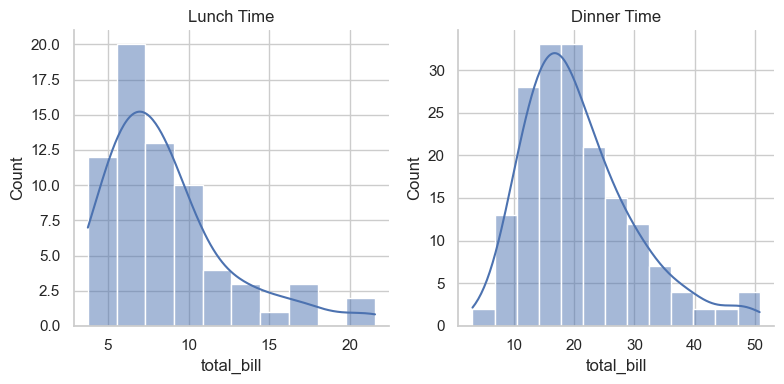

In [5]:
# Independent axes example
# (Simulating a case where one group has much smaller values)
tips_mod = tips.copy()
tips_mod.loc[tips_mod['time'] == 'Lunch', 'total_bill'] /= 2  # shrink lunch bills

g = sns.FacetGrid(
    tips_mod, 
    col='time', 
    sharex=False, 
    sharey=False,
    height=4
)
g.map_dataframe(sns.histplot, x='total_bill', kde=True)
g.set_titles(col_template="{col_name} Time")
plt.show()


## Practice Set
1. Load `penguins` dataset.
2. Facet by `island` (col) and plot `bill_length_mm` vs `bill_depth_mm`.
3. Facet by `species` (row) and plot a histogram of `body_mass_g`.
4. Try `sharey=False` on the histogram plot.


In [6]:
# Practice template
# ...
